#BigData Processing Assignment- 4
##Ashutosh Anand
#202318035

In [4]:
#pip install pyspark

In [20]:
from pyspark import SparkContext
import numpy as np
import pandas as pd
import requests
from pathlib import Path
import zipfile
from pyspark.sql.functions import col
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.functions import corr
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, FloatType, StringType
from pyspark.sql.functions import corr, column

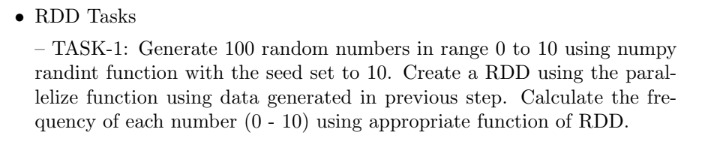

In [6]:
# Initialize Spark Context
sc = SparkContext(appName="NumberFrequency")

# Set seed and generate 100 random numbers between 0 and 10
np.random.seed(10)
random_numbers = np.random.randint(0, 11, 100)

# Create RDD from the generated numbers
numbers_rdd = sc.parallelize(random_numbers)

# Calculate the frequency of each number
frequency = numbers_rdd.countByValue()

# Sort the frequency dictionary by key for better readability
sorted_frequency = dict(sorted(frequency.items()))

# Print the frequency of each number
for number, freq in sorted_frequency.items():
    print(f"Number {number}: Frequency {freq}")

# Stop the Spark Context
sc.stop()

Number 0: Frequency 12
Number 1: Frequency 11
Number 2: Frequency 8
Number 3: Frequency 6
Number 4: Frequency 8
Number 5: Frequency 5
Number 6: Frequency 11
Number 7: Frequency 5
Number 8: Frequency 14
Number 9: Frequency 12
Number 10: Frequency 8


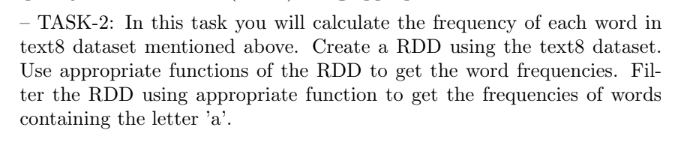

In [7]:
# URL to the text8 dataset
dataset_url = "http://mattmahoney.net/dc/text8.zip"

# Directory to save the zip file
download_directory = "./dataset/"

# Create the directory if it doesn't exist
Path(download_directory).mkdir(parents=True, exist_ok=True)

# File path to save the zip file
zip_file_path = Path(download_directory, "text8_compressed.zip")

# Directory to extract the contents
extracted_directory = Path(download_directory, "text8_data/")

# Create the directory if it doesn't exist
extracted_directory.mkdir(parents=True, exist_ok=True)

# Download the text8 dataset
response = requests.get(dataset_url)
zip_file_path.write_bytes(response.content)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    zip_file.extractall(extracted_directory)

print("Text8 dataset downloaded and extracted successfully.")


Text8 dataset downloaded and extracted successfully.


In [8]:
# Specifying the path to the text file within the extracted folder
text_file_path = extracted_directory / "text8"

# Reading the contents of the text file
with open(text_file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Printing the 500 characters of the text data
print(text_data[200:700])


is still used in a pejorative way to describe any act that used violent means to destroy the organization of society it has also been taken up as a positive label by self defined anarchists the word anarchism is derived from the greek without archons ruler chief king anarchism as a political philosophy is the belief that rulers are unnecessary and should be abolished although there are differing interpretations of what this means anarchism also refers to related social movements that advocate th


In [10]:
# Initialize Spark Context
sc = SparkContext("local", "WordFrequencyTask")

# Create an RDD from the 500 characters of the text data
text_rdd = sc.parallelize(text_data[200:700].splitlines())

# Split each line into words and flatten the list
words_rdd = text_rdd.flatMap(lambda line: line.split(" "))

# Filter words containing the letter 'a'
filtered_words_rdd = words_rdd.filter(lambda word: 'a' in word)

# Map each word to a tuple (word, 1)
mapped_words_rdd = filtered_words_rdd.map(lambda word: (word, 1))

# Reduce by key to count the occurrences of each word
word_frequencies_rdd = mapped_words_rdd.reduceByKey(lambda x, y: x + y)

# Collect the results
results = word_frequencies_rdd.collect()

# Print the frequencies of words containing 'a'
for word, frequency in results:
    print(f"Word: {word}, Frequency: {frequency}")

# Stop the Spark Context
sc.stop()

Word: a, Frequency: 3
Word: pejorative, Frequency: 1
Word: way, Frequency: 1
Word: any, Frequency: 1
Word: act, Frequency: 1
Word: that, Frequency: 3
Word: means, Frequency: 2
Word: organization, Frequency: 1
Word: has, Frequency: 1
Word: also, Frequency: 2
Word: taken, Frequency: 1
Word: as, Frequency: 2
Word: label, Frequency: 1
Word: anarchists, Frequency: 1
Word: anarchism, Frequency: 3
Word: archons, Frequency: 1
Word: political, Frequency: 1
Word: are, Frequency: 2
Word: unnecessary, Frequency: 1
Word: and, Frequency: 1
Word: abolished, Frequency: 1
Word: although, Frequency: 1
Word: interpretations, Frequency: 1
Word: what, Frequency: 1
Word: related, Frequency: 1
Word: social, Frequency: 1
Word: advocate, Frequency: 1


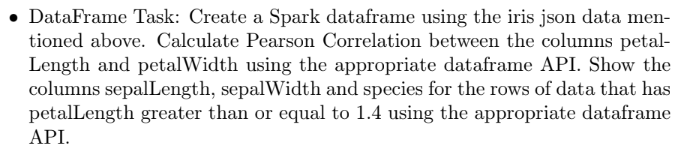

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [16]:
!kaggle datasets download -d rtatman/iris-dataset-json-version

  0% 0.00/1.31k [00:00<?, ?B/s]
100% 1.31k/1.31k [00:00<00:00, 3.36MB/s]


In [17]:
ref_zip = zipfile.ZipFile('/content/iris-dataset-json-version.zip', 'r')
ref_zip.extractall('/content')
ref_zip.close()

In [18]:
iris_df=pd.read_csv('/content/iris.json')
iris_df.head(10)

,,,,,[
"{""sepalLength"": 5.1","""sepalWidth"": 3.5","""petalLength"": 1.4","""petalWidth"": 0.2","""species"": ""setosa""}",NaN
"{""sepalLength"": 4.9","""sepalWidth"": 3.0","""petalLength"": 1.4","""petalWidth"": 0.2","""species"": ""setosa""}",NaN
"{""sepalLength"": 4.7","""sepalWidth"": 3.2","""petalLength"": 1.3","""petalWidth"": 0.2","""species"": ""setosa""}",NaN
"{""sepalLength"": 4.6","""sepalWidth"": 3.1","""petalLength"": 1.5","""petalWidth"": 0.2","""species"": ""setosa""}",NaN
"{""sepalLength"": 5.0","""sepalWidth"": 3.6","""petalLength"": 1.4","""petalWidth"": 0.2","""species"": ""setosa""}",NaN
"{""sepalLength"": 5.4","""sepalWidth"": 3.9","""petalLength"": 1.7","""petalWidth"": 0.4","""species"": ""setosa""}",NaN
"{""sepalLength"": 4.6","""sepalWidth"": 3.4","""petalLength"": 1.4","""petalWidth"": 0.3","""species"": ""setosa""}",NaN
"{""sepalLength"": 5.0","""sepalWidth"": 3.4","""petalLength"": 1.5","""petalWidth"": 0.2","""species"": ""setosa""}",NaN
"{""sepalLength"": 4.4","""sepalWidth"": 2.9","""petalLength"": 1.4","""petalWidth"": 0.2","""species"": ""setosa""}",NaN
"{""sepalLength"": 4.9","""sepalWidth"": 3.1","""petalLength"": 1.5","""petalWidth"": 0.1","""species"": ""setosa""}",NaN


In [32]:
# Start a Spark session
session = SparkSession.builder.master("local").appName("IrisAnalysis").getOrCreate()

# Schema definition for the iris dataset
schema_iris =StructType([
    StructField("sepalLength", DoubleType(), True),
    StructField("sepalWidth", DoubleType(), True),
    StructField("petalLength", DoubleType(), True),
    StructField("petalWidth", DoubleType(), True),
    StructField("species", StringType(), True),
])

# Reading the iris dataset
iris_dataset = session.read.schema(schema_iris).json("/content/iris.json")

# Displaying the dataset
iris_dataset.show()

# Correlation calculation between 'Petal_Length' and 'Petal_Width'
petal_correlation = iris_dataset.select("petalLength", "petalWidth").corr("petalLength", "petalWidth")
print(f"Pearson Correlation between petalLength and petalWidth: {correlation}")

# Selecting and showing rows where 'Petal_Length' is at least 1.4
selective_data = iris_dataset.where(column("petalLength") >= 1.4).select("sepalLength", "sepalWidth", "species")
selective_data.show()

# Closing the Spark session
session.stop()

+-----------+----------+-----------+----------+-------+
|sepalLength|sepalWidth|petalLength|petalWidth|species|
+-----------+----------+-----------+----------+-------+
|       NULL|      NULL|       NULL|      NULL|   NULL|
|        5.1|       3.5|        1.4|       0.2| setosa|
|        4.9|       3.0|        1.4|       0.2| setosa|
|        4.7|       3.2|        1.3|       0.2| setosa|
|        4.6|       3.1|        1.5|       0.2| setosa|
|        5.0|       3.6|        1.4|       0.2| setosa|
|        5.4|       3.9|        1.7|       0.4| setosa|
|        4.6|       3.4|        1.4|       0.3| setosa|
|        5.0|       3.4|        1.5|       0.2| setosa|
|        4.4|       2.9|        1.4|       0.2| setosa|
|        4.9|       3.1|        1.5|       0.1| setosa|
|        5.4|       3.7|        1.5|       0.2| setosa|
|        4.8|       3.4|        1.6|       0.2| setosa|
|        4.8|       3.0|        1.4|       0.1| setosa|
|        4.3|       3.0|        1.1|       0.1| 